In [1]:
import tensorflow as tf
import os
import PIL
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data

In [2]:
data_dir = '/kaggle/input/sports-classification'
print(os.listdir(data_dir))

['EfficientNetB0-100-(224 X 224)- 98.40.h5', 'sports.csv', 'valid', 'test', 'train']


In [3]:
data_training = {}
data_Val = {}
data_test = {}

In [4]:
print ("** Sport Classification Dataset **")

for folders in os.listdir(data_dir):
    
    if folders != "EfficientNetB0-100-(224 X 224)- 98.40.h5":
        if folders != "sports.csv":

            folders_path = os.path.join(data_dir,folders)

            number_of_samples = 0

            print('**',folders,'**')

            for diseases in os.listdir(folders_path):

                diseases_path = os.path.join(folders_path,diseases)


                samples = len(os.listdir(diseases_path))

                print(diseases , ":", samples)


                number_of_samples = number_of_samples + samples

                if folders == "valid":
                  data_Val[diseases] = samples
                elif folders == "test":
                  data_test[diseases] = samples  
                else:
                  data_training[diseases] = samples



            print("Number of samples for ", folders," is ",number_of_samples)
            print("=================================================")

** Sport Classification Dataset **
** valid **
bobsled : 5
hurdles : 5
snow boarding : 5
fly fishing : 5
luge : 5
sidecar racing : 5
ampute football : 5
volleyball : 5
billiards : 5
giant slalom : 5
tennis : 5
horse racing : 5
pole dancing : 5
figure skating women : 5
rollerblade racing : 5
fencing : 5
olympic wrestling : 5
golf : 5
ultimate : 5
harness racing : 5
football : 5
frisbee : 5
bungee jumping : 5
shot put : 5
ice climbing : 5
figure skating men : 5
rowing : 5
bike polo : 5
swimming : 5
judo : 5
axe throwing : 5
archery : 5
baseball : 5
wheelchair basketball : 5
log rolling : 5
lacrosse : 5
rock climbing : 5
horse jumping : 5
hydroplane racing : 5
formula 1 racing : 5
curling : 5
jousting : 5
javelin : 5
water cycling : 5
speed skating : 5
barell racing : 5
bull riding : 5
horseshoe pitching : 5
croquet : 5
chuckwagon racing : 5
hammer throw : 5
rugby : 5
pole climbing : 5
nascar racing : 5
snowmobile racing : 5
boxing : 5
mushing : 5
track bicycle : 5
canoe slamon : 5
disc g

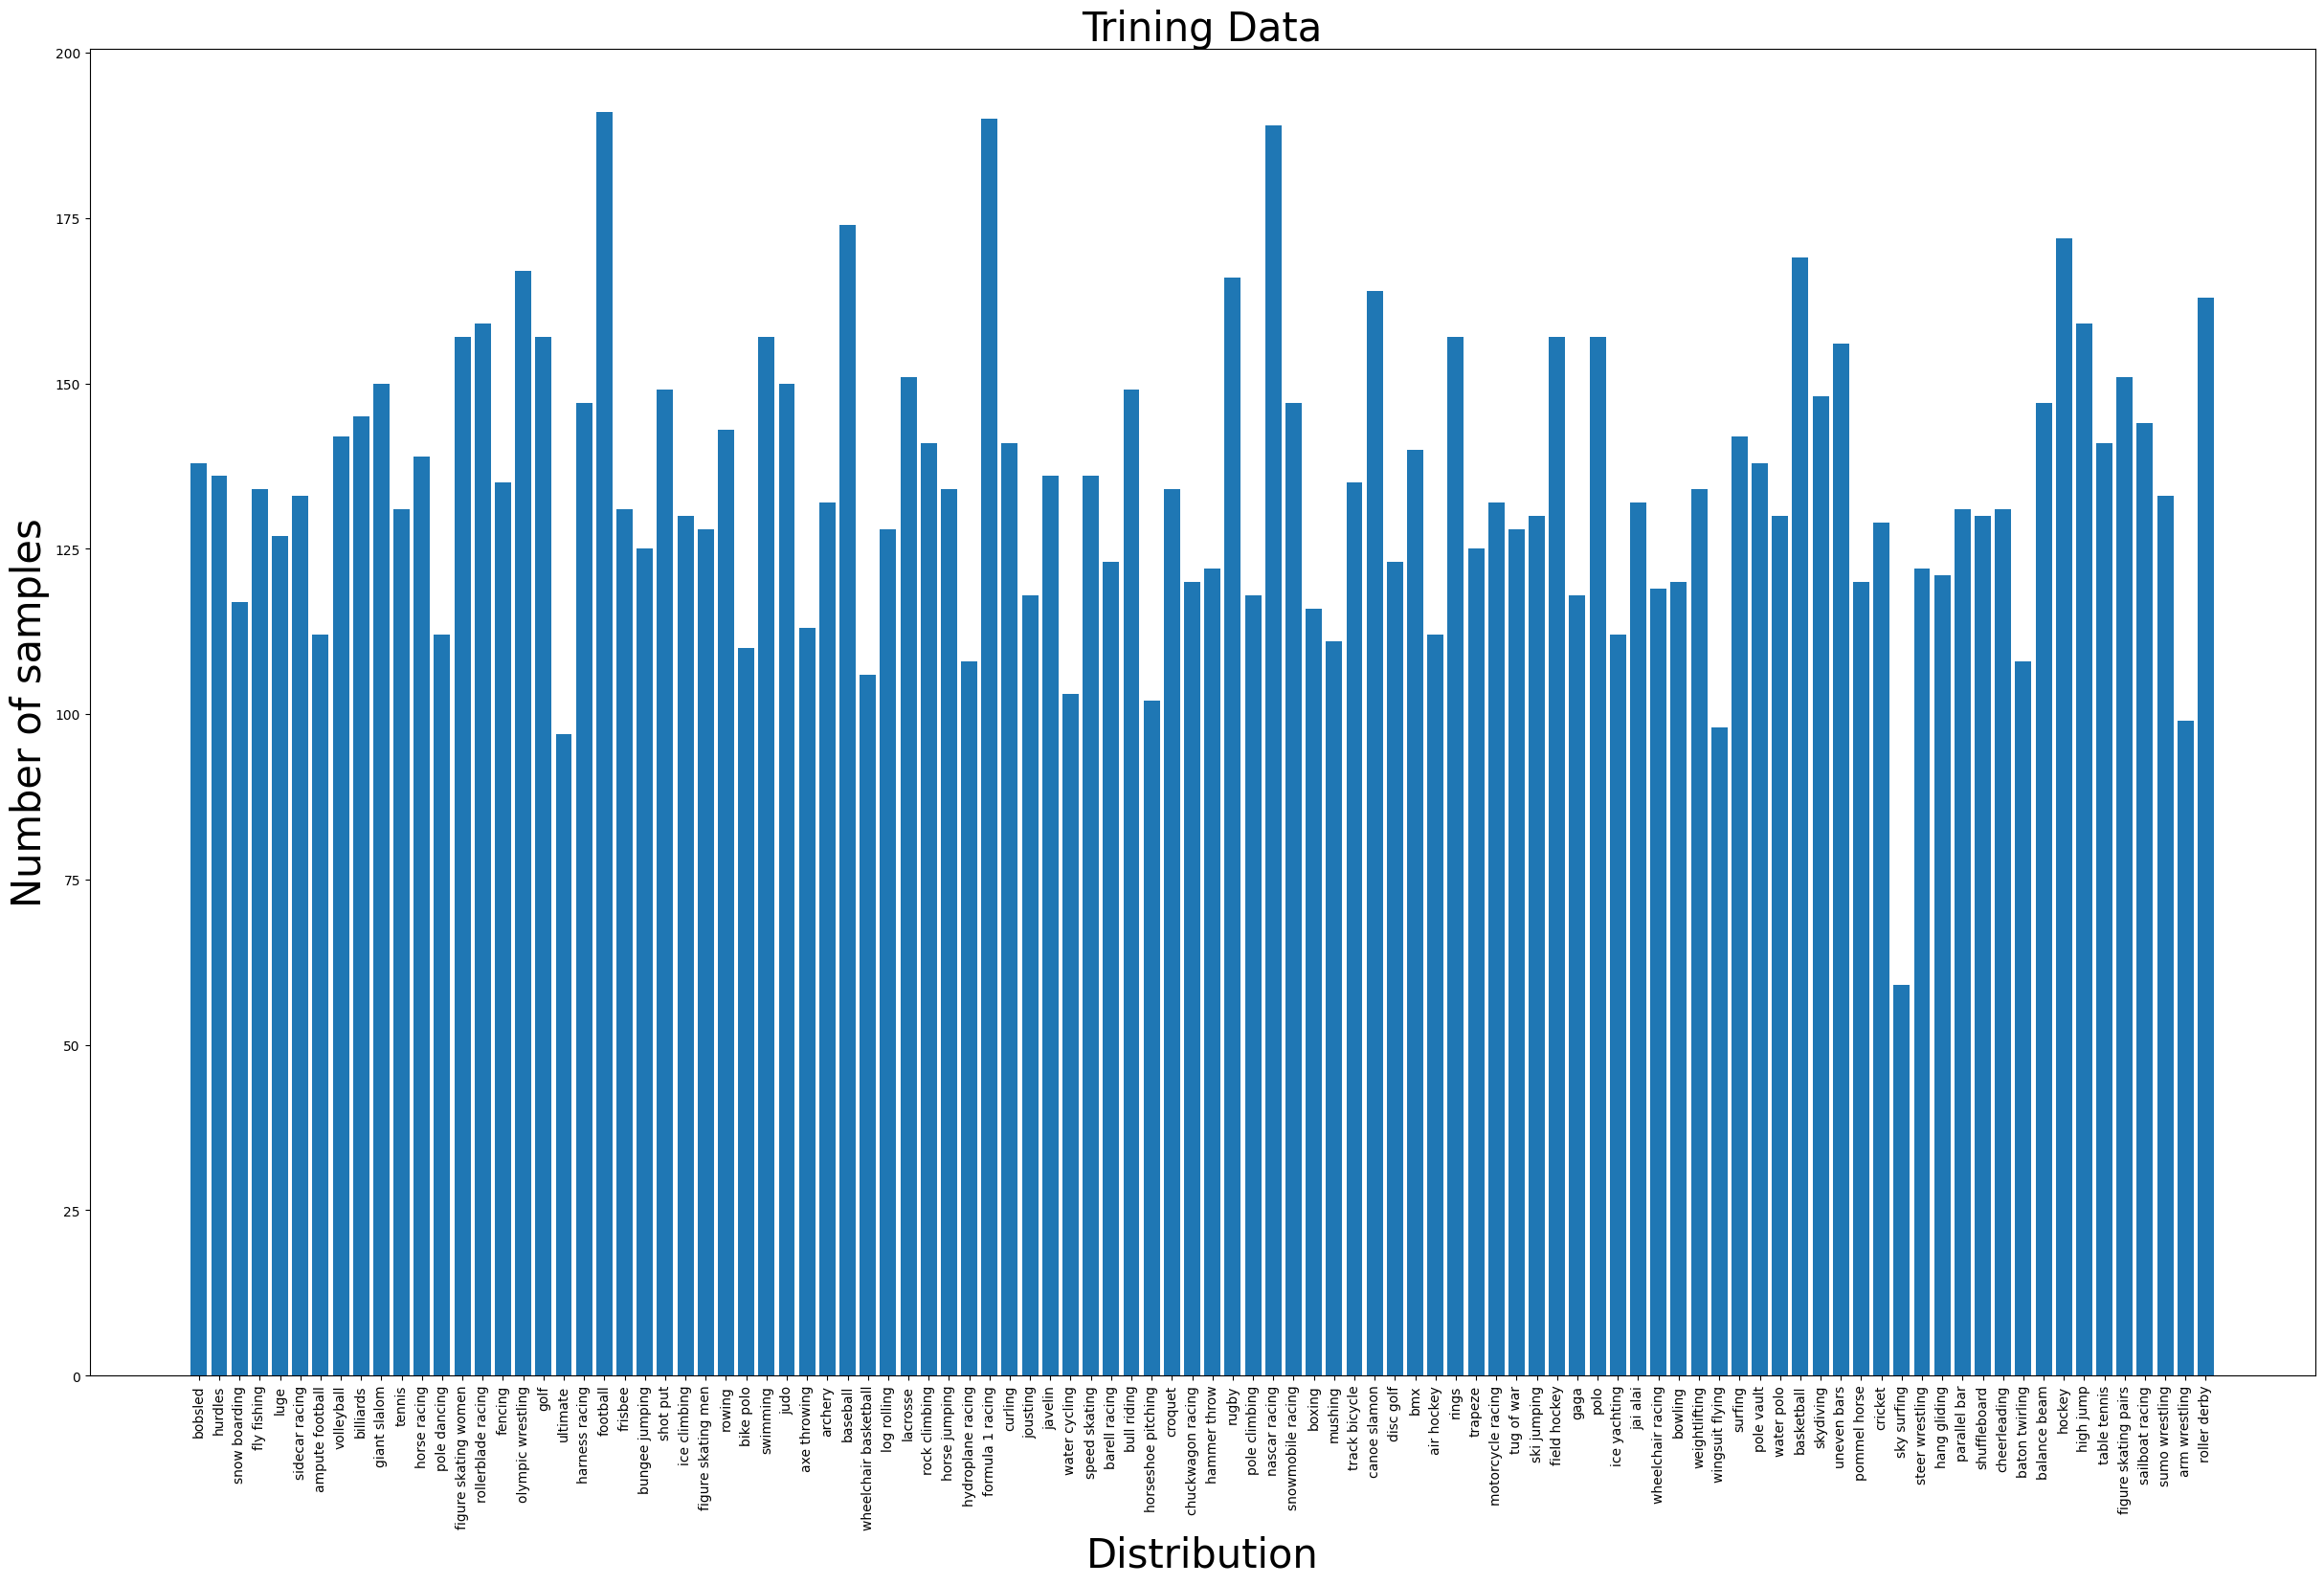

In [5]:
data_training_array = np.array(list(data_training.values()))
plt.figure(figsize=(30, 18))
plt.bar(data_training.keys(), data_training_array)
plt.xticks(rotation=90)
plt.xlabel("Distribution", fontsize=30)
plt.ylabel("Number of samples", fontsize=30)
plt.title("Trining Data", fontsize=30)
plt.show()

# MobileNets-v3

In [6]:
train_dataset = tf.keras.utils.image_dataset_from_directory('/kaggle/input/sports-classification/train',
                                                            shuffle=True,
                                                            batch_size=32,
                                                            label_mode='categorical',
                                                            image_size=(224, 224))

Found 13492 files belonging to 100 classes.


In [7]:
validation_dataset = tf.keras.utils.image_dataset_from_directory('/kaggle/input/sports-classification/valid',
                                                            shuffle=True,
                                                            batch_size=32,
                                                            label_mode='categorical',
                                                            image_size=(224, 224))

Found 500 files belonging to 100 classes.


In [8]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomZoom(.5, .2),
  tf.keras.layers.RandomRotation(0.2),
])

In [9]:
preprocess_input = tf.keras.applications.resnet50.preprocess_input

In [10]:
base_model = tf.keras.applications.resnet50.ResNet50(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')

94765736/94765736 [==============================] - 0s 0us/step


In [11]:
base_model.trainable = False

In [12]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(100, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [13]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics = ['accuracy'])

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                      

In [15]:
history = model.fit(train_dataset,
                    epochs=20,
                    validation_data=validation_dataset,
                    callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3))

Epoch 1/20
422/422 [==============================] - 59s 112ms/step - loss: 3.9574 - accuracy: 0.1317 - val_loss: 2.4492 - val_accuracy: 0.4200
Epoch 2/20
422/422 [==============================] - 47s 110ms/step - loss: 2.4613 - accuracy: 0.3934 - val_loss: 1.5045 - val_accuracy: 0.6360
Epoch 3/20
422/422 [==============================] - 47s 111ms/step - loss: 1.8582 - accuracy: 0.5285 - val_loss: 1.0914 - val_accuracy: 0.7400
Epoch 4/20
422/422 [==============================] - 47s 112ms/step - loss: 1.5443 - accuracy: 0.6104 - val_loss: 0.8735 - val_accuracy: 0.7900
Epoch 5/20
422/422 [==============================] - 48s 112ms/step - loss: 1.3403 - accuracy: 0.6508 - val_loss: 0.7411 - val_accuracy: 0.8120
Epoch 6/20
422/422 [==============================] - 48s 113ms/step - loss: 1.2008 - accuracy: 0.6861 - val_loss: 0.6480 - val_accuracy: 0.8400
Epoch 7/20
422/422 [==============================] - 48s 113ms/step - loss: 1.1097 - accuracy: 0.7052 - val_loss: 0.5814 - val_ac

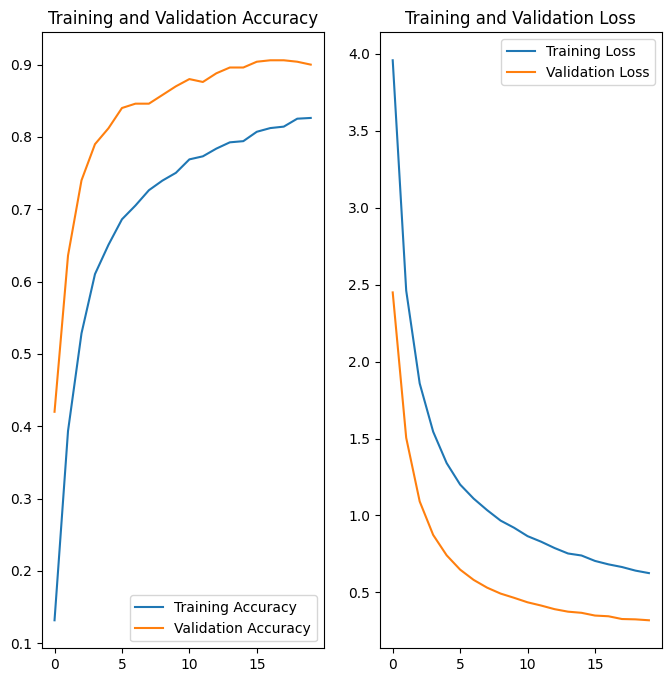

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
model.save("/kaggle/working/ResNet50_TransferLearning_SportsClassification.h5")

In [18]:
len(model.trainable_variables)

2

In [19]:
base_model.trainable = True

print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 100

Number of layers in the base model:  175


In [20]:
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [21]:
len(model.trainable_variables)

92

In [22]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001/10),
              metrics = ['accuracy'])

In [23]:
fine_tune_epochs = 50
total_epochs =  20 + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset,
                         callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3))

Epoch 20/70
422/422 [==============================] - 101s 194ms/step - loss: 0.5435 - accuracy: 0.8420 - val_loss: 0.3090 - val_accuracy: 0.9000
Epoch 21/70
422/422 [==============================] - 81s 192ms/step - loss: 0.4542 - accuracy: 0.8629 - val_loss: 0.2865 - val_accuracy: 0.9140
Epoch 22/70
422/422 [==============================] - 82s 194ms/step - loss: 0.3948 - accuracy: 0.8809 - val_loss: 0.2857 - val_accuracy: 0.9120
Epoch 23/70
422/422 [==============================] - 82s 194ms/step - loss: 0.3532 - accuracy: 0.8912 - val_loss: 0.2923 - val_accuracy: 0.9020
Epoch 24/70
422/422 [==============================] - 83s 195ms/step - loss: 0.3248 - accuracy: 0.9026 - val_loss: 0.2813 - val_accuracy: 0.9060
Epoch 25/70
422/422 [==============================] - 82s 194ms/step - loss: 0.3004 - accuracy: 0.9071 - val_loss: 0.2583 - val_accuracy: 0.9120
Epoch 26/70
422/422 [==============================] - 83s 195ms/step - loss: 0.2641 - accuracy: 0.9162 - val_loss: 0.2444 

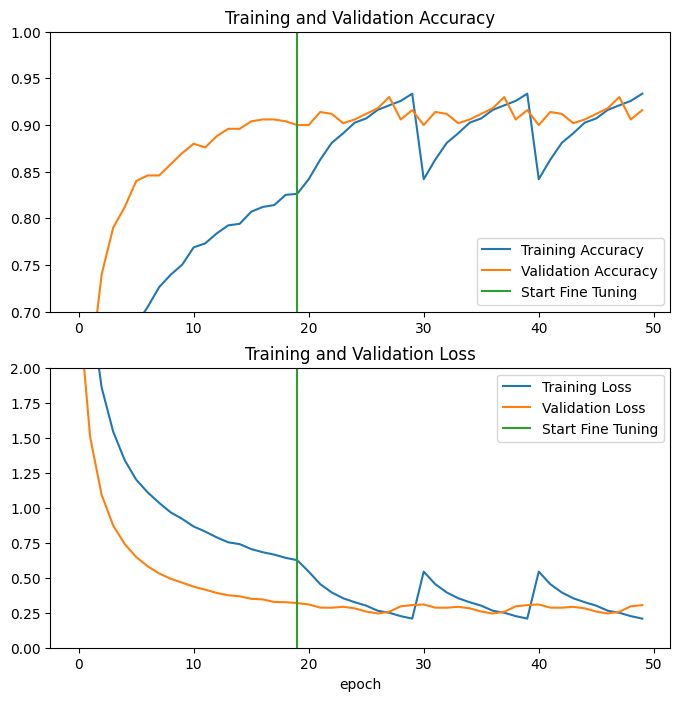

In [27]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.7, 1])
plt.plot([20-1,20-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 2.0])
plt.plot([20-1,20-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

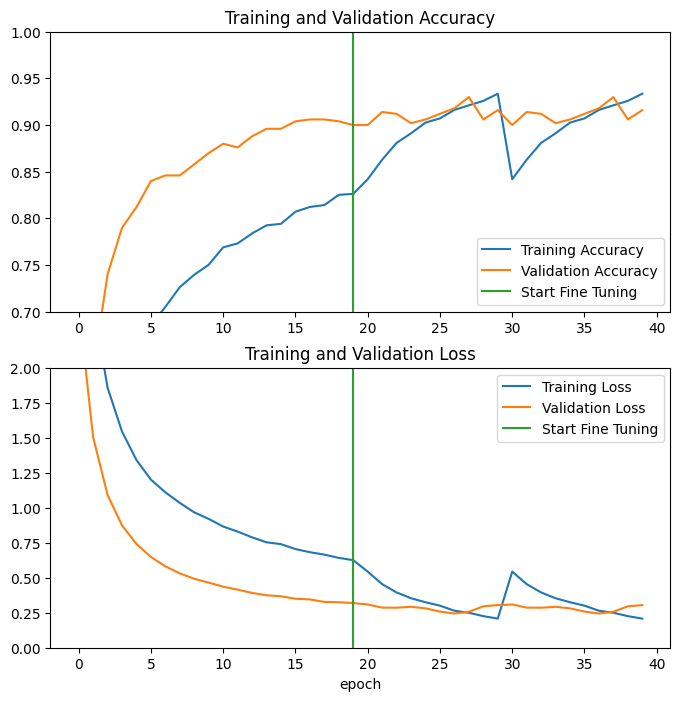

In [26]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.7, 1])
plt.plot([20-1,20-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 2.0])
plt.plot([20-1,20-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [25]:
model.save("/kaggle/working/ResNet50_FineTuning_SportsClassification.h5")